<a href="https://colab.research.google.com/github/megan-the-astronomer/ASTR229/blob/main/image_display_with_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Looking at fits images with python

Now that you've had a chance to look at some real data from McDonald in ds9, it's time to try your hand looking at those data with python.

You can upload files from your local computer but it's much easier to store your data on google drive and access it from within colab. The following notebook assumes that your data are already in a folder in google drive.  

First things first, we need to import the packages we will use for this exercise.

In [ ]:
# start by importing a few essential packages
import numpy as np
import matplotlib.pyplot as plt
import astropy

from astropy.io import fits

## Accessing data stored on google drive

Before we can load a file and look at the data, we have to mount google drive so colab can access it.

To mount google drive, run the following cell. This may produce a popup window for you to grant colab permission to access your drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


You can also use the icons on the left to get a visual overview of the folders and files in your drive.

Colab has a nice feature called "copy path" that you can access by clicking the three vertical dots to the right of a filename.

In [ ]:
my_file = '/content/drive/MyDrive/ASTR230/M101/obj0167.fits'

The line above is the full path to the file - words between slashes are the names of folders (or directories if you are familiar with the command line). So the folder 'M101' is a sub-folder of the bigger 'ASTR230' folder, etc.

To check that everything is working, try loading your image.

In [ ]:
my_image = fits.open(my_file)

# Step 1: looking at the data

First, just type the filename to see what prints out on the command line.

In [ ]:
my_image

The variable ```my_image``` is now a header data unit (HDU) that contains the image data and the header.

This particular fits file only has one extension but data from other observatories may have multiple extensions.

Note the square brackets around the object description. This tells us that we are looking at a list. In this case there is only one element but we still need to specify the index to access the data.

In [ ]:
type(my_image)

astropy.io.fits.hdu.hdulist.HDUList

In [ ]:
len(my_image)

1

In [ ]:
# trying to display the data without the list index throws an error
my_image.data

AttributeError: 'HDUList' object has no attribute 'data'

In [ ]:
my_image[0].data

array([[5494, 4465, 4451, ..., 3150, 3151, 3148],
       [5825, 4360, 4390, ..., 3142, 3153, 3152],
       [6100, 4391, 4379, ..., 3151, 3148, 3148],
       ...,
       [5491, 4351, 4353, ..., 3156, 3153, 3154],
       [5299, 4420, 4343, ..., 3153, 3151, 3150],
       [5071, 4395, 4335, ..., 3144, 3147, 3151]], dtype=uint16)

If we have the correct hdu extension, the line above should print a few partial rows and columns of the data.

To list all the attributes of an object in python, you can also use the 'dir' function. If you scroll down, you should be able to see the 'data' and 'header' attributes.

In [ ]:
dir(my_image[0])

['_EXCLUDE',
 '_MASK',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_axes',
 '_bitpix',
 '_blank',
 '_bscale',
 '_buffer',
 '_bzero',
 '_calculate_checksum',
 '_calculate_datasum',
 '_char_encode',
 '_checksum',
 '_checksum_valid',
 '_close',
 '_compute_checksum',
 '_convert_pseudo_integer',
 '_data_loaded',
 '_data_needs_rescale',
 '_data_offset',
 '_data_replaced',
 '_data_shape',
 '_data_size',
 '_datasum',
 '_datasum_valid',
 '_default_name',
 '_do_not_scale_image_data',
 '_dtype_for_bitpix',
 '_encode_byte',
 '_file',
 '_from_data',
 '_gcount',
 '_get_raw_data',
 '_get_scaled_image_data',
 '_get_timestamp',
 '_has_data',
 '_hdu_registry',
 '_h

 We can use ```shape``` to see how large the array is.

In [ ]:
my_image[0].data.shape

(1024, 1056)

Compare this to the size of the image reported in the image header.

To access the header, look at the ```.header``` part of ```my_image```.

In [ ]:
my_image[0].header

SIMPLE  =                    T / Fits standard                                  
BITPIX  =                   16 / Bits per pixel                                 
NAXIS   =                    2 / Number of axes                                 
NAXIS1  =                 1056 / Axis length                                    
NAXIS2  =                 1024 / Axis length                                    
EXTEND  =                    F / File may contain extensions                    
BSCALE  =           1.000000E0 / REAL = TAPE*BSCALE + BZERO                     
BZERO   =           3.276800E4 /                                                
ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 1999' / FITS file originator        
DATE    = '2024-03-05T10:06:18' / Date FITS file was generated                  
IRAF-TLM= '2024-03-05T10:05:24' / Time of last modification                     
OBJECT  = 'M101    '           / Name of the object observed                    
OBSERVAT= 'MCDONALD         

You can print out specific parts of the header using the header keywords. For example:

In [ ]:
print(my_image[0].header['NAXIS1'],my_image[0].header['NAXIS2'])

1056 1024


Note that the header axis 1 is the larger dimension, same as the *second* axis size returned by the ```shape``` command. What's going on?

Python reports axes as (y,x) - that is, y is the first axis and x is the second axis. This is opposite to ds9 and a number of other computing languages you may encounter. Keep this in mind if something is not behaving as you expect!

If something doesn't seem right, the best thing you can do is *look* at your data. Let's do that now. We'll use matplotlib's ```imshow``` to display our image.

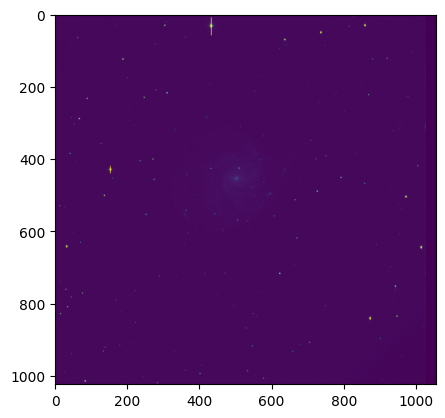

In [ ]:
plt.imshow(my_image[0].data)

Note that the y-axis orientation is opposite to how we usually plot data. We can get a more familiar orientation using the keyword ```origin='lower'```.

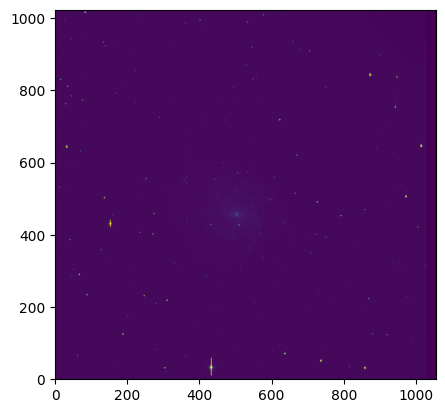

In [ ]:
plt.imshow(my_image[0].data, origin='lower')

Now the orientation looks better but the image is still mostly one color (in this image of M101, you can probably see a few saturated stars - they look like yellow spots with vertical spikes coming out of them).

We can change the scaling to make the image easier to see using the keywords ```vmin``` and ```vmax``` just as you can set the low and high limits in ds9. What values should you use? How can you make a good starting guess? You could play around with image scaling in ds9 first then put those numbers in here but that is not always practical.

Note that astropy has some built-in tools to make this easier. Take a look at the documentation: https://eteq-astropy.readthedocs.io/en/latest/visualization/

I like to start by plotting a colorbar to get an idea of the range of the data, then printing the median to see where most of the data are.

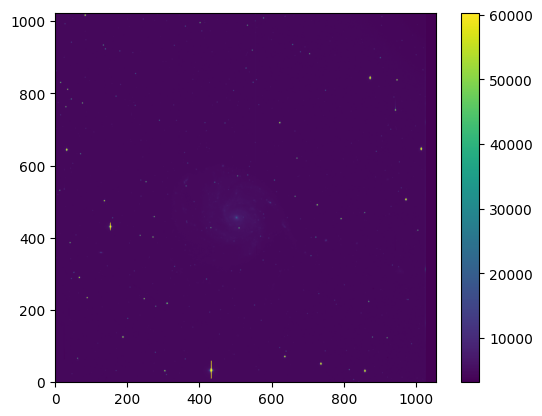

In [ ]:
plt.imshow(my_image[0].data, origin='lower')
plt.colorbar()

Most pixels have values in what range? How does this compare to what you saw in the 'Scale Parameters' graph in ds9?

In [ ]:
np.median(my_image[0].data)

np.float64(4341.0)

Depending on the image you are looking at, there may be one or more pixels whose value is NaN (Not a Number). In this case, numpy will report that the median value of the image is NaN.

To get a more useful answer, you can take the median of all pixel value that are not NaNs using a slightly different numpy function.

In [ ]:
np.nanmedian(my_image[0].data)

np.float64(4341.0)

Note - this should give you the same answer as np.median() if your data does *not* have any NaNs.

Use this to make a first guess for ```vmin``` and ```vmax```. You can always change these later to improve the contrast. The goal for now is to see something in the image.

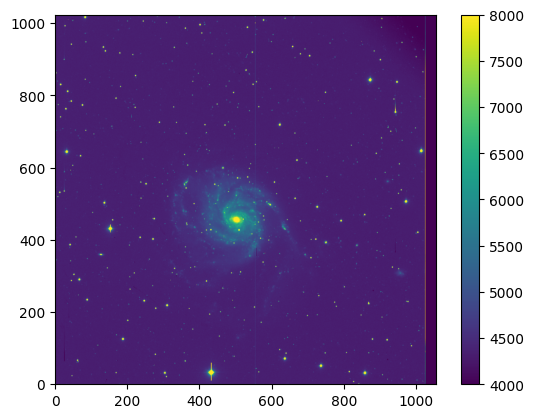

In [ ]:
plt.imshow(my_image[0].data, origin='lower', vmin=4000, vmax=8000)
plt.colorbar()

Notice that the colorbar now reflects the min and max values displayed. This means every pixel with a value $\leq$4000 is the same color (dark purple) and every pixel with a value $\geq$8000 has the same color (yellow).

You can also change the colorscale by setting the keyword ```cmap```. In the bad old days, images were usually shown in black and white because color printing was very expensive. This can still be one of the best ways to display data to highlight specific features in a given image.

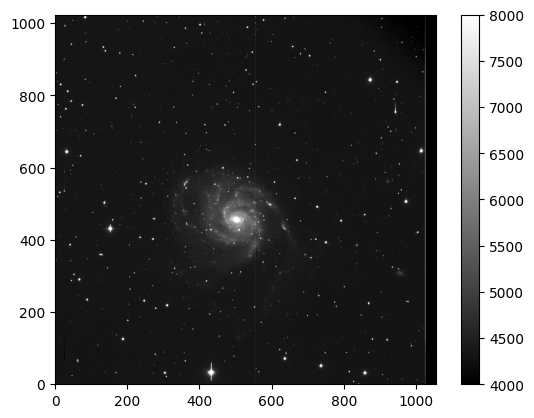

In [ ]:
plt.imshow(my_image[0].data, origin='lower', vmin=4000, vmax=8000, cmap='gray')
plt.colorbar()

Now the pixels with the lowest values are all dark while the brightest pixels are white, much like how we see the night sky. This isn't always the easiest way to see detail in data and uses _a lot_ of ink when printed out (some people still do!), so often images are displayed with an inverse colorscale.  

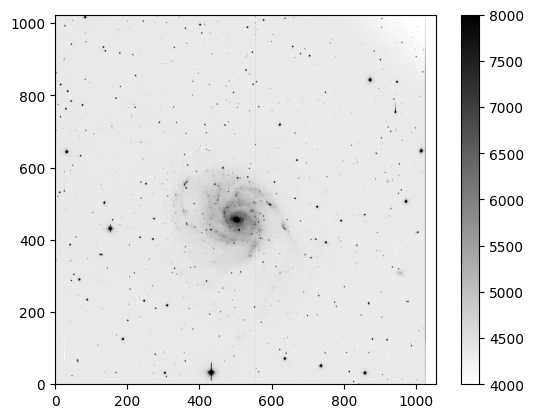

In [ ]:
plt.imshow(my_image[0].data, origin='lower', vmin=4000, vmax=8000, cmap='gray_r')
plt.colorbar()

Be sure to play around with the minimum and maximum values and scaling options until you have brought out as much structure in your image as possible.

# Using array indexing to display only part of an image

Now let's zoom in on part of the image to look at it in more detail.

First, let's remind ourselves how big the image.

In [ ]:
my_image[0].data.shape

(1024, 1056)

You can use array indexing to select only a portion of the image. Pay attention to how the size and shape of the image changes as you change the indexing.

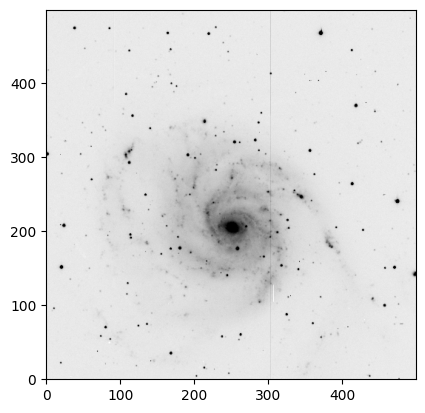

In [ ]:
plt.imshow(my_image[0].data[250:750,250:750], origin='lower', vmin=4000, vmax=8000, cmap='gray_r')

The example above is square - be sure to try changing the axes individually (which index changes the y-axis?).

Pick something interesting in your image (M82 itself?) and zoom in to give us a good view of the object.

In [ ]:
# your code here

# Questions for you

Now that you have a look at the data, use your new python skills to do the following:

1.   Create a title for your image that include
(a) the name of the object and (b) the filter used in the observation. Hint: check the image header for information about the filter used!

2.   Find the exposure time of your image in the header. Convert the exposure time from seconds to minutes.

3.   Calculate the plate scale. This is connects the angular size to the linear separation on the detector. Express your answer in arcsec/pixel. Some information that you will need:

      *   the size of the McDonald image is 46.2 arcmin x 46.2 arcmin
      *   be sure to check the image header and look at your data. Do all of the pixels in the image have astronomical signal? If not, how do you know which pixels to exclude?
      *   you can check you answer against the reported plate scale on the McDonald website: https://mcdonald.utexas.edu/research-facilities/30inch/pfc

4.   Use array indexing to select a portion of the image at least 10 pixels x 10 pixels that has no visible stars (be sure to adjust the scaling to check for faint stars!). Report the following information:
      *  What array ranges did you use?
      *  What is the median value in this portion of the image?
      *  What is the mean (average) value in this portion of the image?

5.   Make a hardcopy of your image using the inverse-grayscale and your best scaling to bring out as many features in the galaxy as possible. Be sure to include the title you made in step 1 and label the exposure time you calculated in step 2. You can right click on your image to download it.

Challenge question: Save your image as a pdf.



